# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 3 - Oscillations

In [125]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Simpletic methods

In this lecture we aim to solve oscillatory systems (harmonic oscillator and pendulums), comparing sympletic algorithms (Euler-Cromer, Verlet) to non-sympletic (Euler, RK).

## Harmonic oscillator

\begin{align}
m \frac{d^2 x}{dt^2} &= -k x, \\
\frac{d^2 x}{dt^2} &= -\omega^2 x, \, \omega = \sqrt{k/m}.
\end{align}

We can make it dimensionless, by defining $\tilde{x} = \omega^2 x$ and $\tilde{t} = \omega t$: 

\begin{align}
\frac{d^2 \tilde{x}}{d\tilde{t}^2} = - \tilde{x}.
\end{align}

## Pendulum

In polar coordinates (with $r=l$ constant) angular Newton's equations reads:

\begin{align}
m \, l \frac{d^2 \theta}{dt^2} &= -m\,g \, \sin(\theta).
\end{align}

and again we make it dimensionless ($\tilde{t} = \omega t$):

\begin{align}
\frac{d^2 \theta}{d \tilde{t}^2} &= - \omega^2 \, \sin(\theta), \, \omega = \sqrt{g/l}
\end{align}

For small oscillations, $\sin(\theta) = \theta$ and we recover the harmonic oscillator.

In [2]:
# Defining functions

def f_osc(x, v, t):
    """ Spring force with linear air resistance and external force."""
    F = np.cos(omega_ext*t)
    return -x - gamma*v + alpha*F

def f_pend(x, v, t):
    """Restoring force for a pendulum with air resistance."""
    return -np.sin(x) - gamma*v
    
def solve_euler(f, t, dt, initials):
    """Solve Newton's equation with Euler."""
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x0, v0 = initials
    x[0] = x0
    v[0] = v0
    
    for i in range(N - 1):
        v[i+1] = v[i] + f(x[i], v[i], t[i])*dt
        x[i+1] = x[i] + v[i]*dt
    
    return x, v

def solve_eulerc(f, t, dt, initials):
    """Solve Newton's equation with Euler-Cromer."""
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x0, v0 = initials
    x[0] = x0
    v[0] = v0
    
    for i in range(N - 1):
        v[i+1] = v[i] + f(x[i], v[i], t[i])*dt
        x[i+1] = x[i] + v[i+1]*dt
    
    return x, v

def energies_osc(x, v):
    """Kinetic, potential and mechanical energy of an oscillator."""
    ke = 0.5*m*(v/omega_osc)**2
    pe = 0.5*k*(x/omega_osc**2)**2
    me = ke + pe
    return ke, pe, me

def energies_pend(x, v):
    """Kinetic, potential and mechanical energy of a pendulum."""
    ke = 0.5*v**2
    pe = (1 - np.cos(x))
    me = ke + pe
    return ke, pe, me

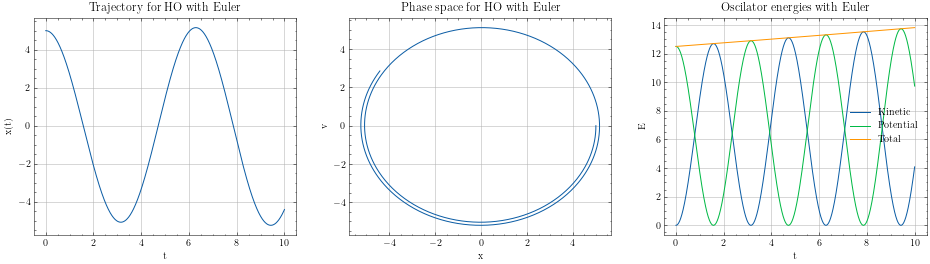

In [3]:
# Simple harmonic motion with Euler

dt = 0.01
t = np.arange(0, 10.0 + dt, dt)
m = 1.0
k = 1.0
omega_osc = np.sqrt(k/m)
omega_ext = 0.0
alpha = 0.0
gamma = 0.0

initials = (5.0, 0.0)

x, v = solve_euler(f_osc, t, dt, initials)
ke, pe, me = energies_osc(x,v)

# Plotting

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Trajectory for HO with Euler')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Phase space for HO with Euler')
plt.grid()

plt.subplot(1,3,3)
plt.plot(t/omega_osc, ke, label='Kinetic')
plt.plot(t/omega_osc, pe, label='Potential')
plt.plot(t/omega_osc, me, label='Total')
plt.xlabel('t')
plt.ylabel('E')
plt.title('Oscilator energies with Euler')
plt.legend()
plt.grid()

plt.show()

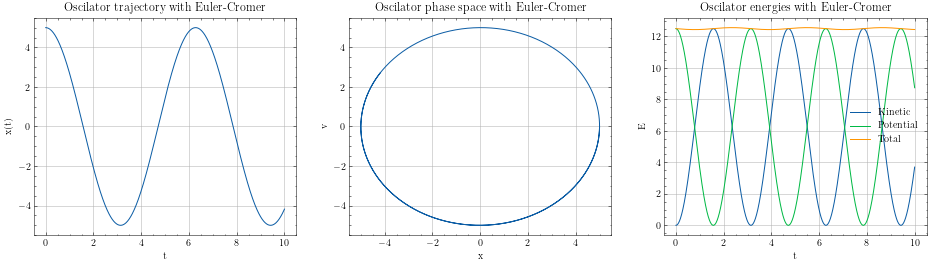

In [4]:
# Simple harmonic motion with Euler-Cromer

x, v = solve_eulerc(f_osc, t, dt, initials)
ke, pe, me = energies_osc(x,v)
    
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Oscilator trajectory with Euler-Cromer')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Oscilator phase space with Euler-Cromer')
plt.grid()

plt.subplot(1,3,3)
plt.plot(t, ke, label='Kinetic')
plt.plot(t, pe, label='Potential')
plt.plot(t, me, label='Total')
plt.xlabel('t')
plt.ylabel('E')
plt.title('Oscilator energies with Euler-Cromer')
plt.legend()
plt.grid()

plt.show()

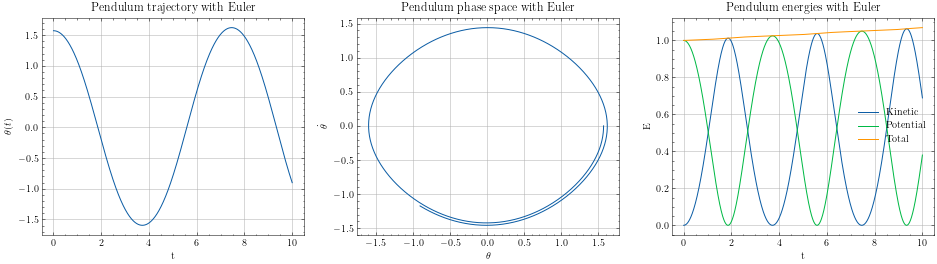

In [5]:
# Pendulum with Euler

initials = (np.pi/2, 0.0)
g = 9.81
l = 9.81
omega_pend = np.sqrt(g/l)

x, v = solve_euler(f_pend, t, dt, initials)
ke, pe, me = energies_pend(x,v)
    
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title('Pendulum trajectory with Euler')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, v)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.title('Pendulum phase space with Euler')
plt.grid()

plt.subplot(1,3,3)
plt.plot(t, ke, label='Kinetic')
plt.plot(t, pe, label='Potential')
plt.plot(t, me, label='Total')
plt.xlabel('t')
plt.ylabel('E')
plt.title('Pendulum energies with Euler')
plt.legend()
plt.grid()

plt.show()

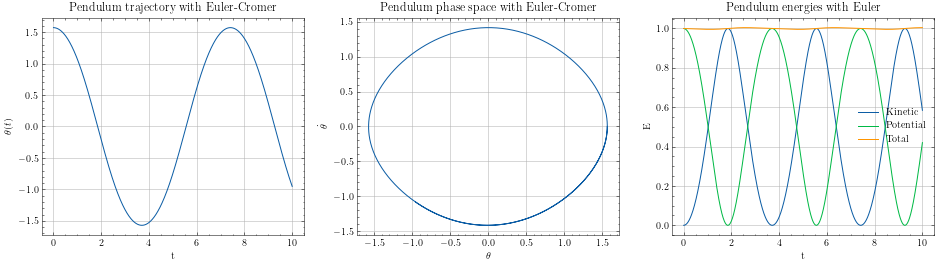

In [6]:
# Pendulum with Euler-Cromer

x, v = solve_eulerc(f_pend, t, dt, initials)
ke, pe, me = energies_pend(x,v)
    
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title('Pendulum trajectory with Euler-Cromer')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, v)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.title('Pendulum phase space with Euler-Cromer')
plt.grid()

plt.subplot(1,3,3)
plt.plot(t, ke, label='Kinetic')
plt.plot(t, pe, label='Potential')
plt.plot(t, me, label='Total')
plt.xlabel('t')
plt.ylabel('E')
plt.title('Pendulum energies with Euler')
plt.legend()
plt.grid()

plt.show()

## Dissipation and external force

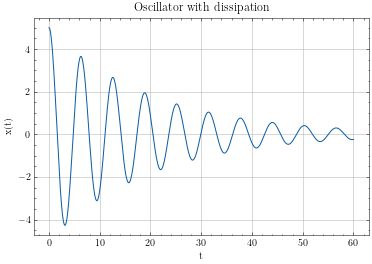

In [7]:
dt = 0.01
t = np.arange(0, 60.0 + dt, dt)
m = 1.0
k = 1.0
omega_0 = np.sqrt(k/m)
gamma = 0.1
alpha = 0.0
omega_ext = 0.9

initials = (5.0, 0.0)

x, v = solve_eulerc(f_osc, t, dt, initials)

plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Oscillator with dissipation')
plt.grid()
plt.show()

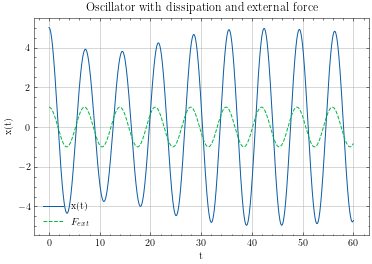

In [8]:
# Dissipation and external force # omega_ext = 0.9*omega_osc

gamma = 0.1
alpha = 1.0
omega_ext = 0.9

x, v = solve_eulerc(f_osc, t, dt, initials)

plt.plot(t, x, label='x(t)')
plt.plot(t, alpha*np.cos(omega_ext*t), linestyle='--', label='$F_{ext}$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Oscillator with dissipation and external force')
plt.grid()
plt.legend()
plt.show()

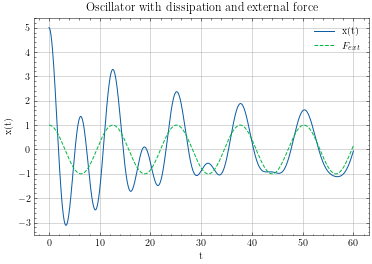

In [9]:
gamma = 0.1
alpha = 1.0
omega_ext = 0.5

x, v = solve_eulerc(f_osc, t, dt, initials)

plt.plot(t, x, label='x(t)')
plt.plot(t, alpha*np.cos(omega_ext*t), linestyle='--', label='$F_{ext}$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Oscillator with dissipation and external force')
plt.grid()
plt.legend()
plt.show()

In [10]:
# Plotting A_max as a function of w_ext

dt = 0.01
t = np.arange(0, 100.0 + dt, dt)


gamma = 0.1
alpha = 1.0

A_max = []
omega_ext_list = np.linspace(0, 2, 21)

for w in omega_ext_list: 

    omega_ext = w
    x, v = solve_eulerc(f_osc, t, dt, initials)
    A_max.append(x[-4000:].max())


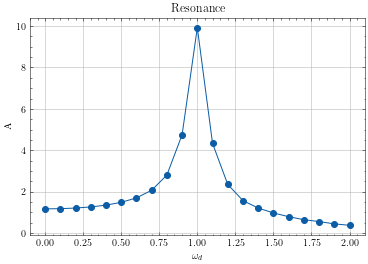

In [11]:
plt.plot(omega_ext_list, A_max, marker='o')
plt.title('Resonance')
plt.xlabel('$\omega_d$')
plt.ylabel('A')
plt.grid()
plt.show()

## Animations

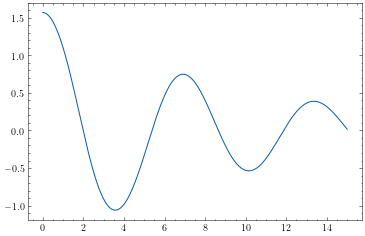

In [12]:
# Solve a pendulum with Euler-Cromer

dt = 0.01
t = np.arange(0, 15+dt, dt)

initials = (np.pi/2, 0.0)
g = 9.81
l = 9.81
omega_pend = np.sqrt(g/l)
gamma = 0.2 

x, v = solve_eulerc(f_pend, t, dt, initials)

x_pos = l*np.sin(x)
y_pos = -l*np.cos(x)

plt.plot(t, x)

In [13]:
# # Animating

# from matplotlib.animation import FuncAnimation
# from IPython import display

# fig = plt.figure()
# lines = plt.plot([], marker='o')
# line = lines[0]
# plt.xlim(-10, 11)
# plt.ylim(-11, 2)

# def animate(frame):
#     line.set_data((x_pos[frame], y_pos[frame]))
    
# anim = FuncAnimation(fig, animate, frames=1500, interval=dt*1000)
# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close()

## Phase space diagrams

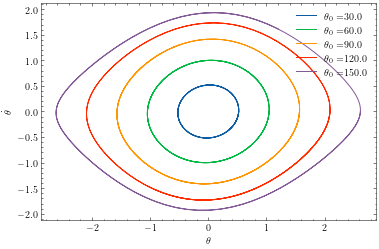

In [14]:
# Phase space diagrams: theta0

dt = 0.1
t = np.arange(0, 20.0 + dt, dt)
N = len(t)

x0 = [np.pi/6, np.pi/3, np.pi/2, np.pi/1.5, np.pi/1.2]

x_list = []
v_list = []

for j in range(len(x0)):

    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0[j]
    v[0] = 0.0

    def f(x):
        return -np.sin(x)

    for i in range(N - 1):
        v[i+1] = v[i] + f(x[i])*dt
        x[i+1] = x[i] + v[i+1]*dt
    
    x_list.append(x)
    v_list.append(v)
    plt.plot(x, v, label=r'$\theta_0 = $'+str(np.round(180.0*x0[j]/np.pi)))

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.legend()
plt.show()

In [136]:
# Animating the phase space for an oscillator

dt = 0.01
t = np.arange(0, 2*np.pi+dt, dt)
N = len(t)

points = np.arange(0, 3+0.5, 0.5)
x0_list = []
v0_list = []

for i in range(len(points)):
    for j in range(len(points)):
        x0_list.append(points[i])
        v0_list.append(points[j])

x = np.zeros((N, len(x0_list)))
v = np.zeros((N, len(v0_list)))

x[0] = x0_list
v[0] = v0_list

def f(x):
    return -x

for i in range(N-1):
    x[i+1] = x[i] + v[i]*dt + 0.5*f(x[i])*dt**2
    v[i+1] = v[i] + 0.5*(f(x[i]) + f(x[i+1]))*dt


# Animating

fig = plt.figure()
plt.plot(x,v, alpha=0.1)
lines = plt.plot([], marker='o', linestyle='')
line = lines[0]
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.xlabel('x')
plt.xlabel('v')
plt.axis('scaled')
plt.title('Phase space time evolution for a oscillator')

def animate(frame):
    line.set_data((x[frame], v[frame]))
    
anim = FuncAnimation(fig, animate, frames=N, interval=dt*1000*2)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [135]:
# Animating the phase space for a pendulum

dt = 0.01
t = np.arange(0, 4*np.pi+dt, dt)
N = len(t)

points = np.arange(0, 1.0, 0.1)
x0_list = []
v0_list = []

for i in range(len(points)):
    for j in range(len(points)):
        x0_list.append(points[i])
        v0_list.append(points[j])

x = np.zeros((N, len(x0_list)))
v = np.zeros((N, len(v0_list)))

x[0] = x0_list
v[0] = v0_list

def f(x):
    return -np.sin(x)

for i in range(N-1):
    x[i+1] = x[i] + v[i]*dt + 0.5*f(x[i])*dt**2
    v[i+1] = v[i] + 0.5*(f(x[i]) + f(x[i+1]))*dt
    
fig = plt.figure()
plt.plot(x,v, alpha=0.1)
lines = plt.plot([], marker='o', linestyle='')
line = lines[0]
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.xlabel('v')
plt.axis('scaled')
plt.title('Phase space time evolution for a pendulum')

def animate(frame):
    line.set_data((x[frame], v[frame]))
    
anim = FuncAnimation(fig, animate, frames=N, interval=dt*1000*2)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()